<a href="https://colab.research.google.com/github/alsam123/Image-Denoisers/blob/main/Image_denoiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

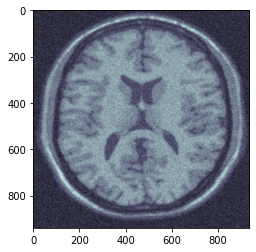

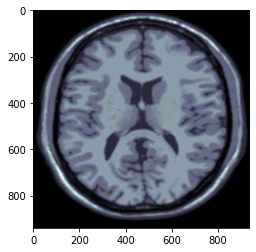

In [47]:
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage as nd

noisy_img = img_as_float(io.imread("/MRI_noisy.tif"))
ref_img = img_as_float(io.imread("/MRI_clean.tif"))
plt.figure()
plt.imshow(noisy_img, cmap=plt.cm.bone)
plt.figure()
plt.imshow(ref_img, cmap=plt.cm.bone)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.112001291081445


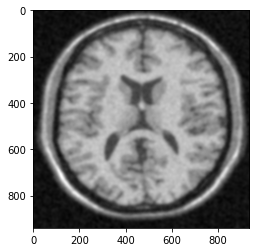

In [ ]:
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
gaussian_cleaned_psnr = peak_signal_noise_ratio(ref_img, gaussian_img)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", gaussian_cleaned_psnr)
gaussian_img = nd.gaussian_filter(noisy_img, sigma=5)
plt.imshow(gaussian_img, cmap='gray')

In [48]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

noisy_img = img_as_float(io.imread("/MRI_noisy.tif"))
sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)

denoise_bilateral = denoise_bilateral(noisy_img, sigma_spatial=15,
                multichannel=False)

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
bilateral_cleaned_psnr = peak_signal_noise_ratio(ref_img, denoise_bilateral)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", bilateral_cleaned_psnr)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  16.225197089561874


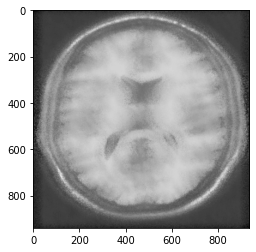

In [ ]:
plt.imshow(denoise_bilateral, cmap='gray')

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.19161931394431


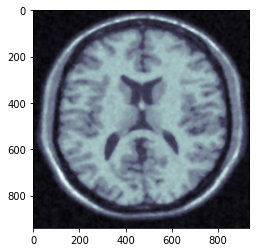

In [49]:
denoise_TV = denoise_tv_chambolle(noisy_img, weight=0.3, multichannel=False)
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
TV_cleaned_psnr = peak_signal_noise_ratio(ref_img, denoise_TV)

plt.imshow(denoise_TV, cmap=plt.cm.bone)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", TV_cleaned_psnr)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.0525032515753


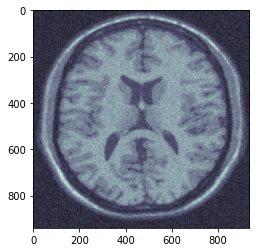

In [50]:
wavelet_smoothed = denoise_wavelet(noisy_img, multichannel=False,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
Wavelet_cleaned_psnr = peak_signal_noise_ratio(ref_img, wavelet_smoothed)

plt.imshow(wavelet_smoothed,cmap=plt.cm.bone)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", Wavelet_cleaned_psnr)

/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.7/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.16316211540548


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """


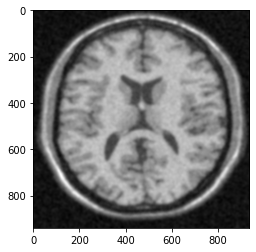

In [51]:
import cv2
!pip install medpy
from medpy.filter.smoothing import anisotropic_diffusion
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=50, kappa=50, gamma=0.2, option=2) 
anisotropic_cleaned_psnr = peak_signal_noise_ratio(ref_img, img_aniso_filtered)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", anisotropic_cleaned_psnr)


plt.imshow(img_aniso_filtered, cmap='gray')

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.056279941818776


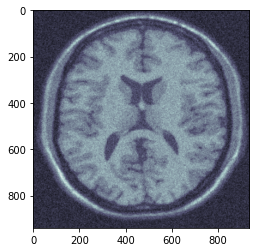

In [52]:
from skimage import data
from skimage.util import random_noise
from skimage.restoration import  cycle_spin
denoise_kwargs = dict(multichannel=False, wavelet='db1', method='BayesShrink',
                      rescale_sigma=True)

all_psnr = []
max_shifts = 3     #0, 1, 3, 5

Shft_inv_wavelet = cycle_spin(noisy_img, func=denoise_wavelet, max_shifts = max_shifts,
                            func_kw=denoise_kwargs, multichannel=False)

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
shft_cleaned_psnr = peak_signal_noise_ratio(ref_img, Shft_inv_wavelet)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", shft_cleaned_psnr)

plt.imshow(Shft_inv_wavelet,cmap=plt.cm.bone)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.03790009274298


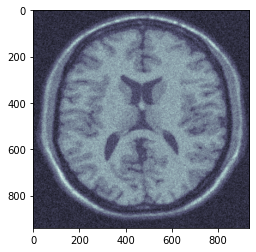

In [53]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
import numpy as np

sigma_est = np.mean(estimate_sigma(noisy_img, multichannel=False))


NLM_skimg_denoise_img = denoise_nl_means(noisy_img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=9, patch_distance=5, multichannel=False)

noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
NLM_skimg_cleaned_psnr = peak_signal_noise_ratio(ref_img, NLM_skimg_denoise_img)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", NLM_skimg_cleaned_psnr)
plt.imshow(NLM_skimg_denoise_img,cmap=plt.cm.bone)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.16316211540548


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  """


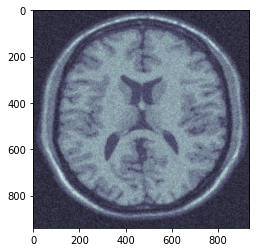

In [54]:
noisy_img = io.imread("/MRI_noisy.tif", as_gray=True)  #Only 8 bit supported for CV2 NLM
ref_img = io.imread("/MRI_clean.tif")
NLM_CV2_denoise_img = cv2.fastNlMeansDenoising(noisy_img, None, 3, 5, 21)
noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
NLM_skimg_cleaned_psnr = peak_signal_noise_ratio(ref_img, NLM_skimg_denoise_img)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", anisotropic_cleaned_psnr)


plt.imshow( NLM_CV2_denoise_img, cmap=plt.cm.bone)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.372042121309388


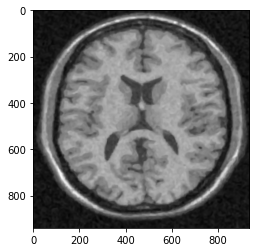

In [55]:
!pip install bm3d
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import peak_signal_noise_ratio
import bm3d
import numpy as np


noisy_img = img_as_float(io.imread("/MRI_noisy.tif", as_gray=True))
ref_img = img_as_float(io.imread("/MRI_clean.tif", as_gray=True))


BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)
#BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

                      


noise_psnr = peak_signal_noise_ratio(ref_img, noisy_img)
BM3D_cleaned_psnr = peak_signal_noise_ratio(ref_img, BM3D_denoised_image)
print("PSNR of input noisy image = ", noise_psnr)
print("PSNR of cleaned image = ", BM3D_cleaned_psnr)


plt.imshow(BM3D_denoised_image, cmap='gray')

<BarContainer object of 9 artists>

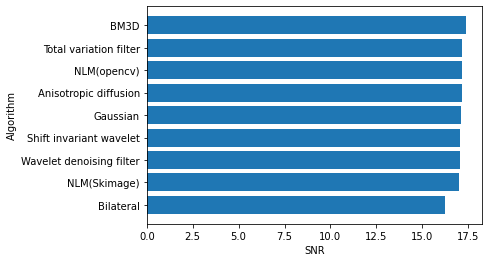

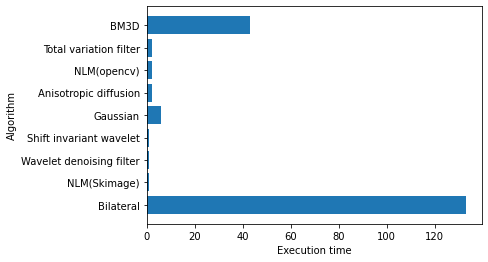

In [57]:


time=[133,1,1,1,6,2,2,2,43]
psnr = [16.23,17.03,17.05,17.05,17.11,17.16,17.16,17.19,17.37]
x_indexes = ['Bilateral','NLM(Skimage)','Wavelet denoising filter','Shift invariant wavelet','Gaussian','Anisotropic diffusion','NLM(opencv)','Total variation filter','BM3D']
width=0.5
plt.xlabel('SNR')
plt.ylabel('Algorithm')
plt.barh(x_indexes,psnr)
plt.figure()
plt.xlabel('Execution time')
plt.ylabel('Algorithm')
plt.barh(x_indexes,time)